# Детектирование объектов

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import patches

%matplotlib inline
%load_ext autoreload
%autoreload 2
%precision %.2f

'%.2f'

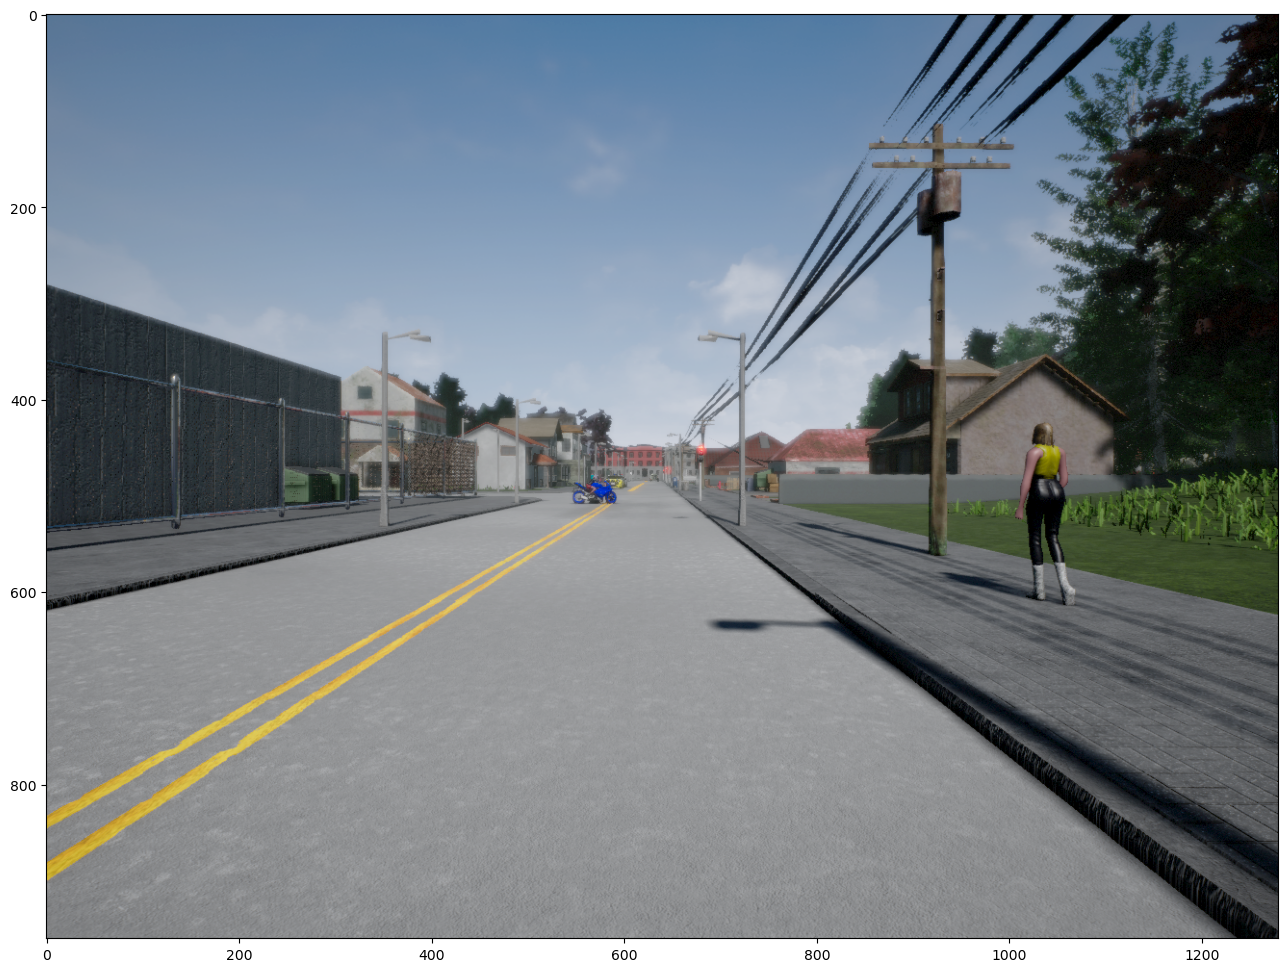

In [2]:
# Read the images
img_left = cv2.imread("../../datasets/object-detection/frame_00077_1547042741L.png")[...,::-1]

plt.figure(figsize=(16, 12), dpi=100)
plt.imshow(img_left)

Допустим, что у нас есть некоторое препятствие, которое мы хотели бы объехать.

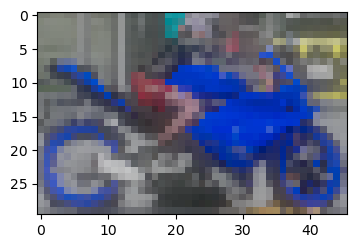

In [3]:
# Get the image of the obstacle
obstacle_image = img_left[479:509, 547:593, :]

# Show the obstacle image
plt.figure(figsize=(4, 4))
plt.imshow(obstacle_image)
plt.show()

Теперь мы хотели бы, чтобы система автоматически определяла, где находится это препятствие в сцене. Для этого мы будем использовать взаимную корреляцию. Для работы такого алгоритма требуется огромное количество вычислений для каждого пикселя изображения.


В библиотеке уже есть необходимые нам функции cv2.[matchTemplate()](https://docs.opencv.org/3.4.3/df/dfb/group__imgproc__object.html#ga586ebfb0a7fb604b35a23d85391329be) - для кросс-корреляции, возвращает нам тепловую карту.

И из тепловой карты при помощи cv2.[minMaxLoc()](https://docs.opencv.org/3.4.3/d2/de8/group__core__array.html#ga8873b86a29c5af51cafdcee82f8150a7) мы можем получить координаты препятствия.

In [4]:
def locate_obstacle_in_image(image, obstacle_image):
    """
    Будьте аккуратны с методами, которые используете в opencv, сверяйтесь с документацией.
    """
    cross_corr_map = cv2.matchTemplate(image, obstacle_image, method = cv2.TM_CCOEFF)
    obstacle_location = cv2.minMaxLoc(cross_corr_map)[3] # возвращает несколько параметров, но мы берем только max_loc
    
    return cross_corr_map, obstacle_location

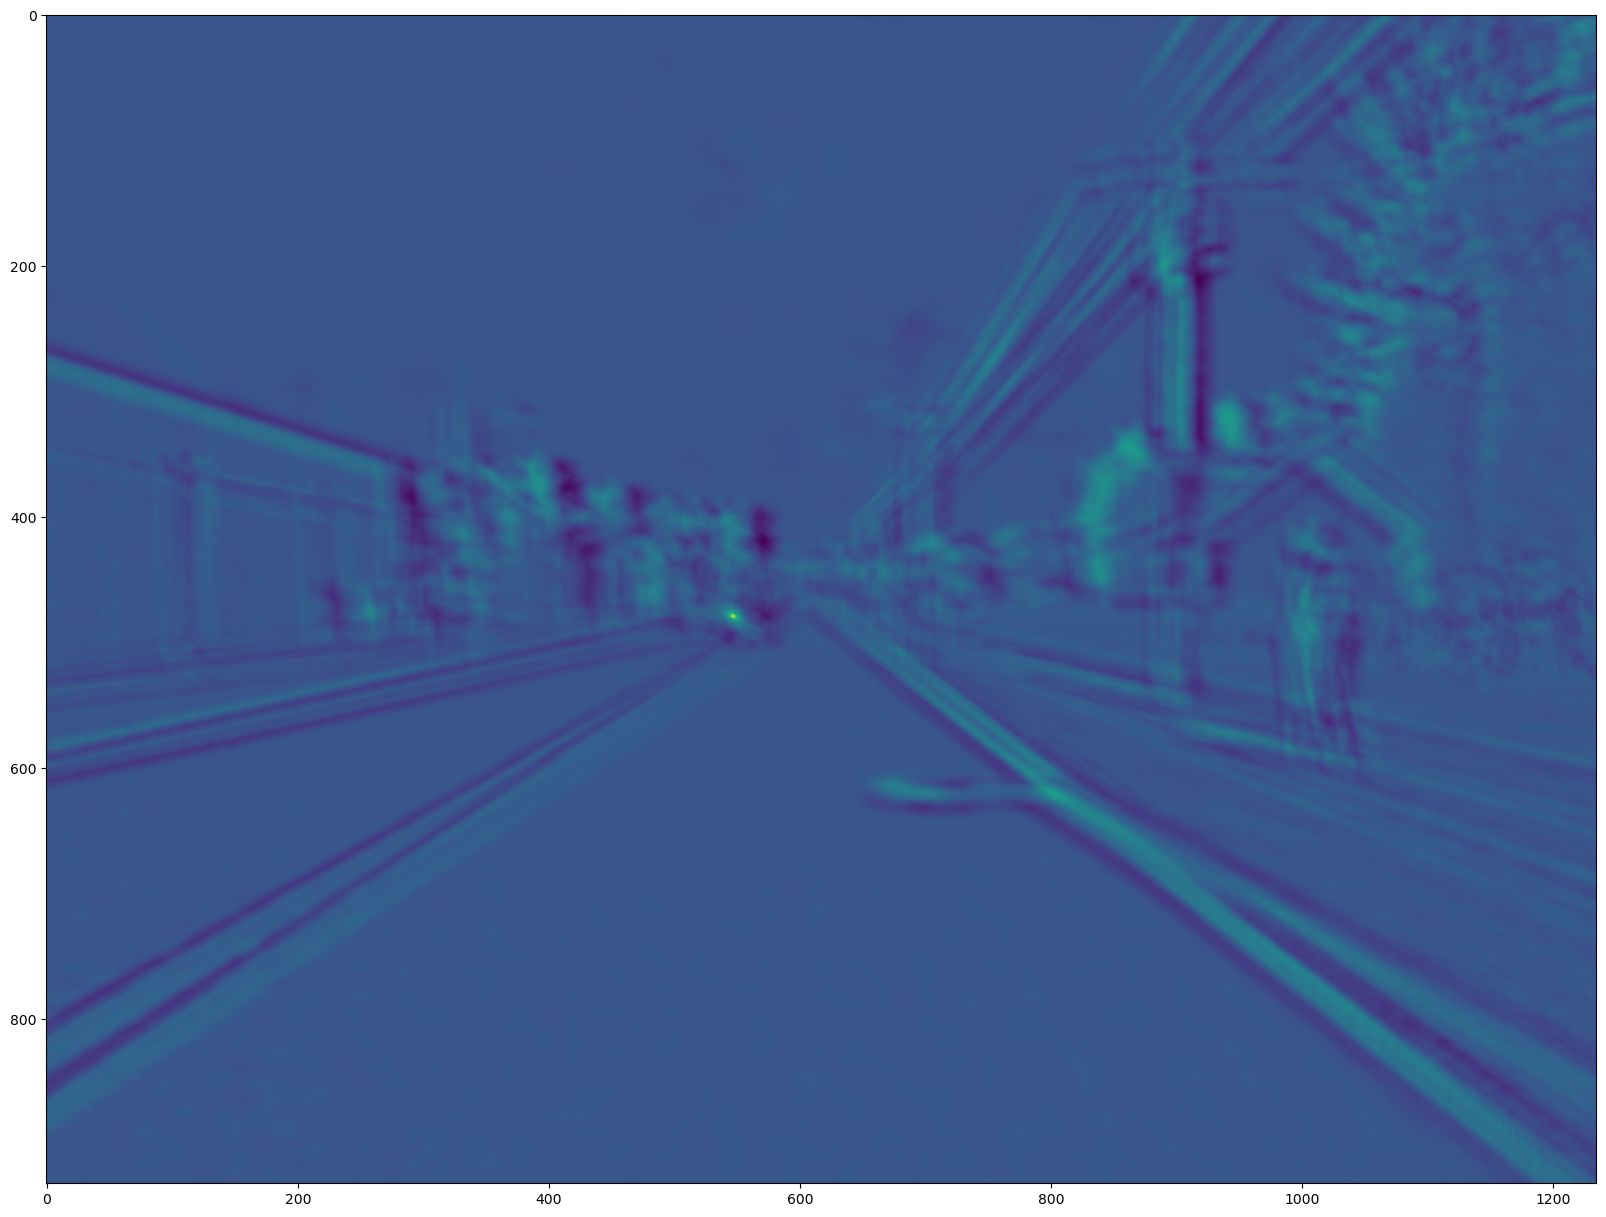

obstacle_location 
 (547, 479)


In [5]:
# Gather the cross correlation map and the obstacle location in the image
cross_corr_map, obstacle_location = locate_obstacle_in_image(img_left, obstacle_image)

# Display the cross correlation heatmap 
plt.figure(figsize=(20, 20))
plt.imshow(cross_corr_map)
plt.show()

# Print the obstacle location
print("obstacle_location \n", obstacle_location)

obstacle_height, obstacle_width = 30 46


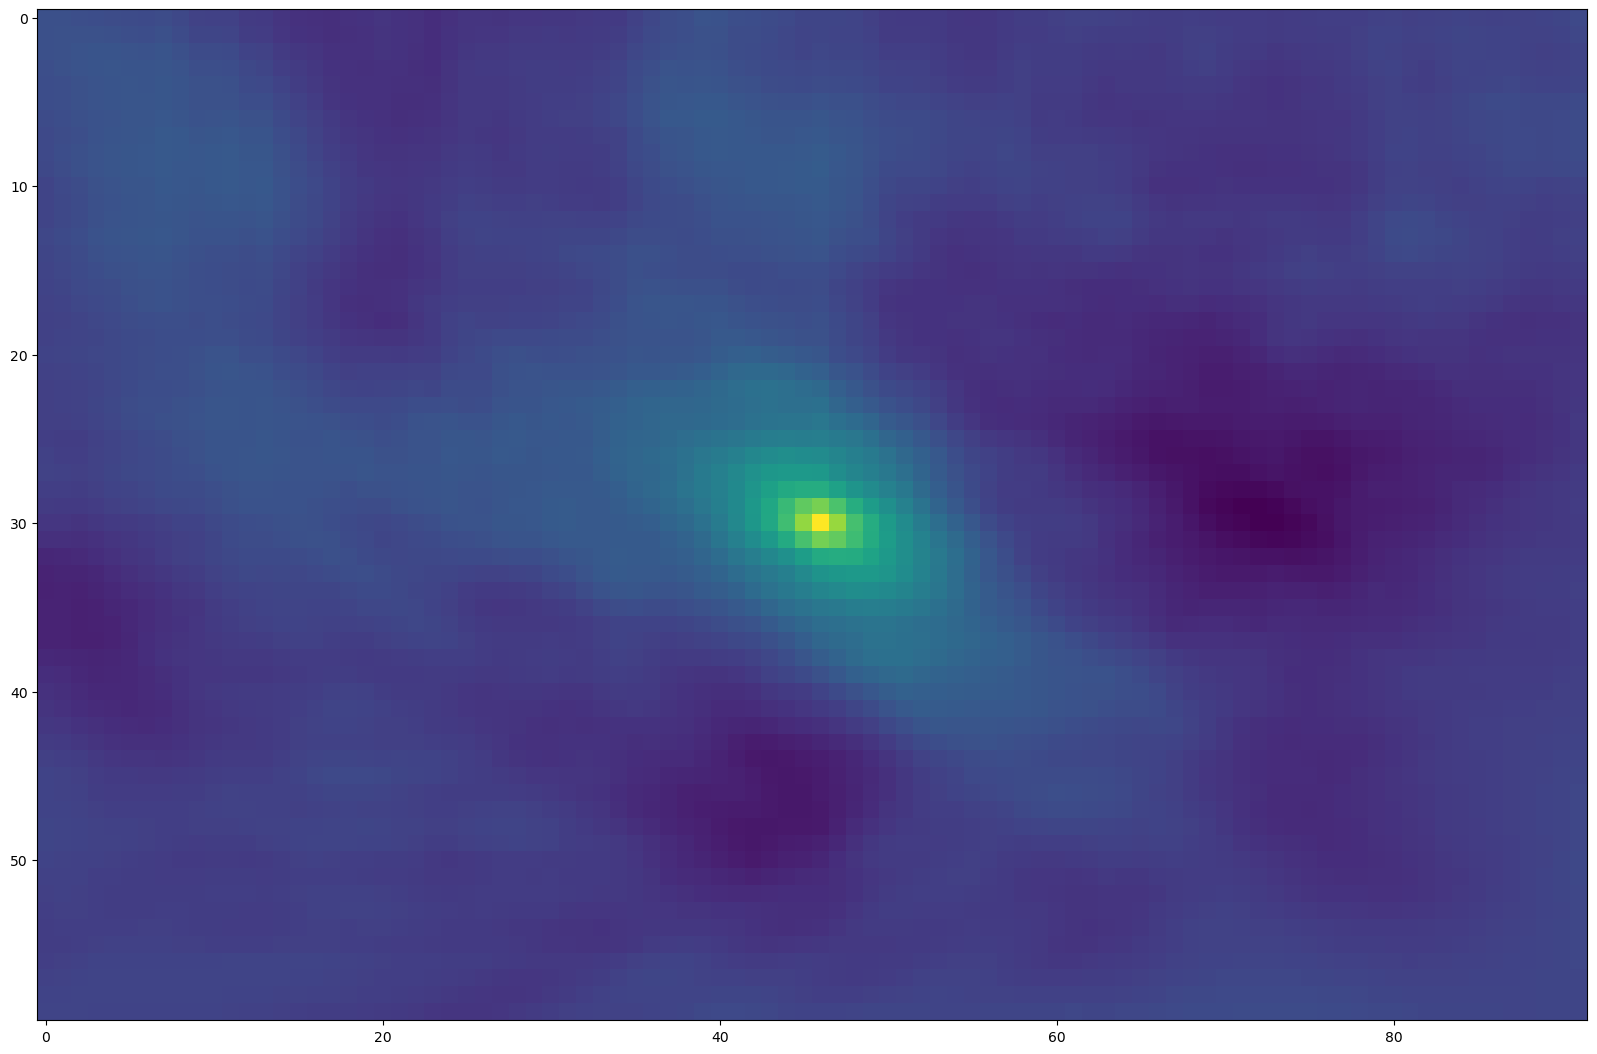

In [6]:
obstacle_height, obstacle_width, _ = obstacle_image.shape
print('obstacle_height, obstacle_width =', obstacle_height, obstacle_width)
# посмотрим зитмэп поближе
object_image = cross_corr_map[obstacle_location[1]-obstacle_height:obstacle_location[1]+obstacle_height, obstacle_location[0]-obstacle_width:obstacle_location[0]+obstacle_width]
# Display the cross correlation heatmap 
plt.figure(figsize=(20, 20))
plt.imshow(object_image)
plt.show()

Рекомендуем также [туториал по сопоставлению изображений](https://docs.opencv.org/4.x/d4/dc6/tutorial_py_template_matching.html)

Все, что осталось сделать, это обрезать участок карты глубины, соответствующий препятствию, и найти ближайшую точку на этом участке.

In [7]:
def calculate_bb(obstacle_location, obstacle_img):
    
    obstacle_height, obstacle_width, _ = obstacle_img.shape
    obstacle_min_x_pos = obstacle_location[1] 
    obstacle_min_y_pos = obstacle_location[0]
    
    # Create the obstacle bounding box 
    obstacle_bbox = patches.Rectangle((obstacle_min_y_pos, obstacle_min_x_pos), obstacle_width, obstacle_height,
                                 linewidth=1, edgecolor='r', facecolor='none')
    
    return obstacle_bbox

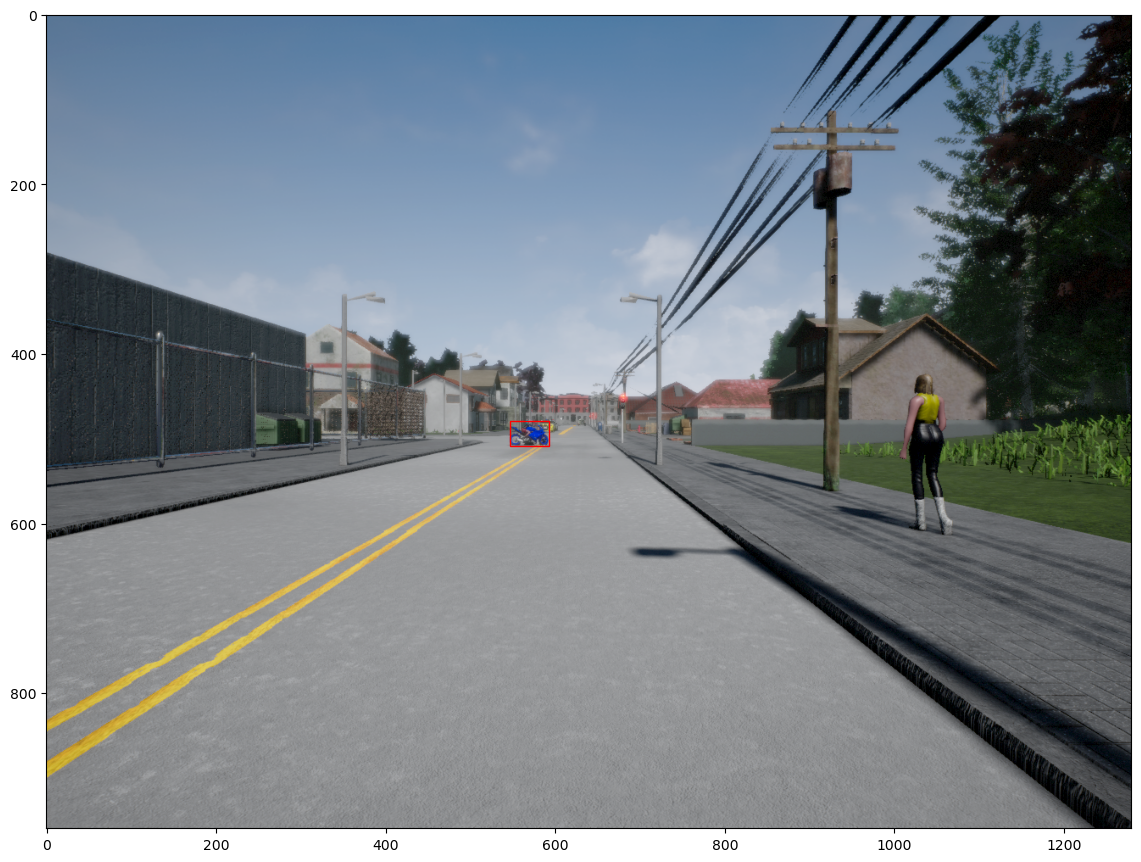

In [8]:
# Use the developed nearest point function to get the closest point depth and obstacle bounding box
obstacle_bbox = calculate_bb(obstacle_location, obstacle_image)

# Display the image with the bounding box displayed
fig, ax = plt.subplots(1, figsize=(14, 14))
ax.imshow(img_left)
ax.add_patch(obstacle_bbox)
plt.show()